# Credit Risks
Giving credit is a risky business. Banks and other financial institutions do their best to screen for all relevant details before granting credit. Let's see if we can help them with that!
License: the dataset is CC0: Public Domain, and it is publicly available in the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)).
You will need to use GitHub to complete this mini project. Find Guidelines of Using GitHub Here.

## Expected Output
By the end of this mini project, you are supposed to deliver within your code:
- Multiple accuracy measures resembling different k-neighbors used for training your KNN classifier.
- One printed confusion matrix for the best model.

### Step 1 Download the Dataset
Method 1
Download the dataset from the following link:
https://www.openml.org/d/31
Method 2
Use Scikit-learn library to directly download the dataset into your python notebook.
Check out how?

### Step 2 Reading the Dataset
Read the dataset into a Pandas DataFrame!
Does the dataset include any missing values? If so, drop them!
Hint:
Pandas can do that with one line of code!


In [70]:
from scipy.io import arff
import pandas as pd
# Load the ARFF file
file_path = "dataset_31_credit-g.arff"  # Update this with the correct path
data, meta = arff.loadarff(file_path)

# Convert to Pandas DataFrame
df = pd.DataFrame(data)

print(df.info())
print(df.head())

# convert byte string to string
for col in df.columns:
    if df[col].dtype != 'float64':
        df[col] = df[col].str.decode('utf-8')

print(df.info())
print(df.head())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         1000 non-null   object 
 1   duration                1000 non-null   float64
 2   credit_history          1000 non-null   object 
 3   purpose                 1000 non-null   object 
 4   credit_amount           1000 non-null   float64
 5   savings_status          1000 non-null   object 
 6   employment              1000 non-null   object 
 7   installment_commitment  1000 non-null   float64
 8   personal_status         1000 non-null   object 
 9   other_parties           1000 non-null   object 
 10  residence_since         1000 non-null   float64
 11  property_magnitude      1000 non-null   object 
 12  age                     1000 non-null   float64
 13  other_payment_plans     1000 non-null   object 
 14  housing                 1000 non-null   o

### Step 3 Feature Selection
Choose the features you think are relevant to our analysis! There are A LOT of features in this dataset, but we have to make our model's training time reasonable.
You MUST include at least four (4) numeric features and at least three (3) nominal features. You can choose more if you prefer.

In [77]:
# Define selected features
numeric_features = ['duration', 'credit_amount', 'installment_commitment', 'age']
categorical_features = ['checking_status', 'credit_history', 'purpose']

# all features
numeric_features_all = df.select_dtypes(include=['int64', 'float64']).columns
categorical_features_all = df.select_dtypes(include=['object']).columns

# Create new DataFrame with selected features
selected_features = numeric_features + categorical_features
df_selected = df[selected_features]

# Display first few rows
print(df_selected.head())

   duration  credit_amount  installment_commitment   age checking_status  \
0       6.0         1169.0                     4.0  67.0              <0   
1      48.0         5951.0                     2.0  22.0        0<=X<200   
2      12.0         2096.0                     2.0  49.0     no checking   
3      42.0         7882.0                     2.0  45.0              <0   
4      24.0         4870.0                     3.0  53.0              <0   

                   credit_history              purpose  
0  critical/other existing credit             radio/tv  
1                   existing paid             radio/tv  
2  critical/other existing credit            education  
3                   existing paid  furniture/equipment  
4              delayed previously              new car  


### Step 4 Preprocessing
Perform any needed pre-processing on the chosen features, includes:
- Scaling
- Encoding
- Dealing with NaN values

Note:
Use only the preprocessing steps you think are useful.

In [72]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, LabelEncoder

# check null values
print(df_selected.isnull().sum())
# class column is the target
y = df.iloc[:, 20].values
# endcode y
encoded_y = LabelEncoder().fit_transform(y)
# Encoding categorical features using OneHotEncoder
encoded_categorical_X = OneHotEncoder(drop='first').fit_transform(df_selected[categorical_features]).toarray()
# Scaling nemerical features
scaled_numeric_X = MinMaxScaler().fit_transform(df_selected[numeric_features])
# combined features
import numpy as np
combined_X = np.hstack((scaled_numeric_X, encoded_categorical_X))


duration                  0
credit_amount             0
installment_commitment    0
age                       0
checking_status           0
credit_history            0
purpose                   0
dtype: int64


### Step 5 Splitting the Data

Split your data as follows:

- 80% training set
- 10% validation set
- 10% test set

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# List of feature datasets (NumPy arrays)
X_datasets = [scaled_numeric_X, encoded_categorical_X, combined_X]
dataset_names = ["Numeric Only", "Categorical Only", "Combined"]

# Dictionary to store train, validation, and test splits
data_splits = {}

# Split the data (80% train, 10% validation, 10% test)
for i, X in enumerate(X_datasets):
    y = encoded_y  # Target variable (NumPy array)

    # First split: 80% Train, 20% Temporary (Validation + Test)
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # Second split: 50% Validation, 50% Test (which is 10% each from original data)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

    # Store in dictionary
    data_splits[dataset_names[i]] = {
        "X_train": X_train, "y_train": y_train,
        "X_val": X_val, "y_val": y_val,
        "X_test": X_test, "y_test": y_test
    }


### Step 6 Training Classifiers

- Use the KNN-classifier model to train your data.
- Choose the best k for the KNN algorithm by trying different values and validating performance on the validation set.

**Note:**

choosing the best k is an example of hyper-parameter tuning.

**Classification Metrics**

Print the accuracy score of your final classifier.

print the confusion matrix.

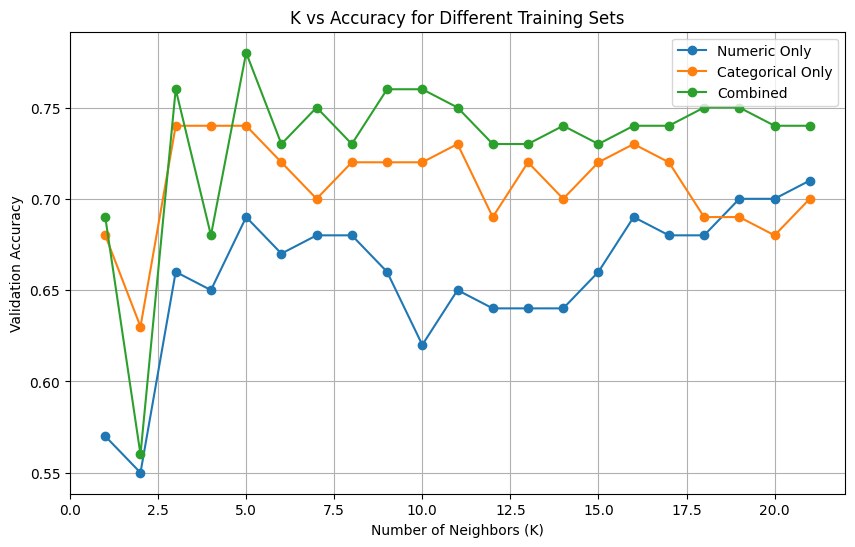

In [74]:
# Plot K vs Accuracy for each dataset
plt.figure(figsize=(10, 6))

for dataset_name in dataset_names:
    X_train, y_train = data_splits[dataset_name]["X_train"], data_splits[dataset_name]["y_train"]
    X_val, y_val = data_splits[dataset_name]["X_val"], data_splits[dataset_name]["y_val"]

    accuracies = []
    k_values = range(1, 22)  # Trying K values from 1 to 21

    for k in k_values:
        model = KNeighborsClassifier(n_neighbors=k)
        model.fit(X_train, y_train)

        y_pred = model.predict(X_val)
        accuracy = accuracy_score(y_val, y_pred)
        accuracies.append(accuracy)

    # Plot accuracy curve for each dataset
    plt.plot(k_values, accuracies, marker='o', label=dataset_name)

# Customize the plot
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Validation Accuracy")
plt.title("K vs Accuracy for Different Training Sets")
plt.legend()
plt.grid(True)
plt.show()

**print the confusion matrix**

Confusion Matrix for Combined at K=5:
 [[11 19]
 [ 7 63]]


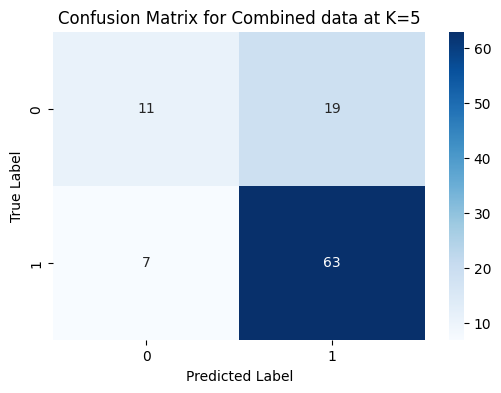

In [76]:
# Focus on "Combined" dataset and K=5
dataset_name = "Combined"
X_train, y_train = data_splits[dataset_name]["X_train"], data_splits[dataset_name]["y_train"]
X_test, y_test = data_splits[dataset_name]["X_test"], data_splits[dataset_name]["y_test"]

# Train KNN for K=5
k = 5
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train, y_train)

# Predict on the test set
y_test_pred = model.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Print confusion matrix
print(f"Confusion Matrix for {dataset_name} at K={k}:\n", cm)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title(f"Confusion Matrix for {dataset_name} data at K={k}")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()